# Reflectometry
Here we briefly analyze how the total impedance of the resonant circuit changes as a function of the resistance of the device for the PCB board Iron Kid (values of capacitance not sure if they are correct)

From [Josip's thesis](https://research-explorer.app.ist.ac.at/download/7996/7998/PhD_thesis_JK_pdfa.pdf):

> The readout technique which senses a device impedance change through the reflected wave amplitude and phase change is called reflectometry. As shown in Figure 4.6, typically an RF sinusoidal wave of amplitude Ain is sent towards the measured device. Changes in the device impedance Z modify the reflection coefficient ($\Gamma$) according to:

> $$\Gamma = \frac{Z-Z_0}{Z+Z_0}$$

> where the $Z_0$ = 50 is the characteristic impedance of the coaxial cables. Consequential
changes of the amplitude and the phase of the reflected wave $A_r = A_{in}\Gamma$ are
measured with the lock-in technique. From Figure 4.7b we can see that the highest
sensitivity takes place for Z smaller than Z0. Since the impedance of our devices
are typically much higher than $Z_0$, we use a LC matching circuit in order to reduce the
resulting impedance and increase the sensitivity. A simplified schematic of the matching
circuit and the measured device can be seen at the bottom right of Figure 4.6.

### How does the matching circuit work?
At the resonance the total impedance of the resonant circuit is:
$$Z_{tot, res}=R_l+\frac{L}{C_{tot}R_D}$$

where $R_l$ is the resistance of the inductor, $L$ the inductor, $C_{tot}=C_{device}+C_{paras}$ and $R_D$ the resistance of the device.

In this notebook we compare the effects of changing $L$ and $C_{tot}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Z_resonant(Rl, L, C_tot, Rdevice):
    return Rl+L/(C_tot*Rdevice)

def Reflection(Z):
    return np.abs((Z-50)/(Z+50))

# Iron kid 1

In [7]:
Z0 = 50 # Ohm
Rm = 1 # Ohm
L_list = [560e-9, 680e-9, 820e-9, 1200e-9]# H
C_list = [0.5e-12, 1e-12, 1.5e-12, 2e-12] # F
Rdevice = np.linspace(10e3, 300e3, 500) #100e3 # Ohm

### Impedances

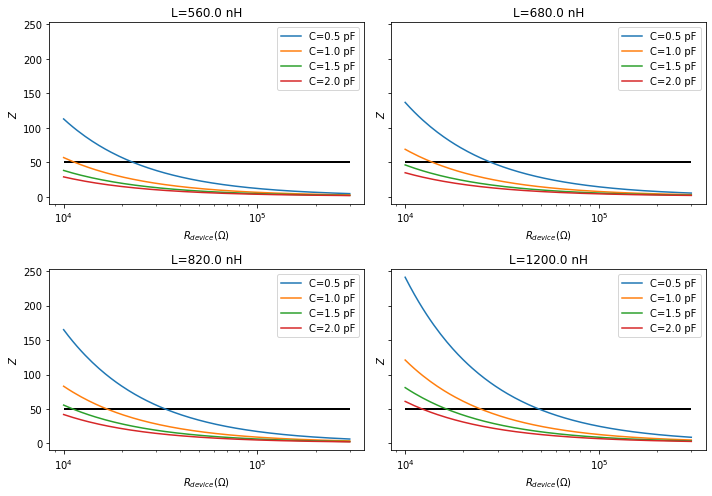

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True, figsize=(10,7))

for idx, ax in enumerate(fig.get_axes()):
    for C_tot in C_list:
        ax.semilogx(Rdevice, Z_resonant(Rm, L_list[idx], C_tot, Rdevice), label='C={} pF'.format(C_tot*10**12))
        ax.hlines(50, min(Rdevice), max(Rdevice))
        ax.set_xlabel(r'$R_{device} (\Omega)$')
        ax.set_ylabel(r'$Z$')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    
plt.tight_layout()

### Reflection coeffiecient and sensitivity.

Plots shifted vertically for better visualization.

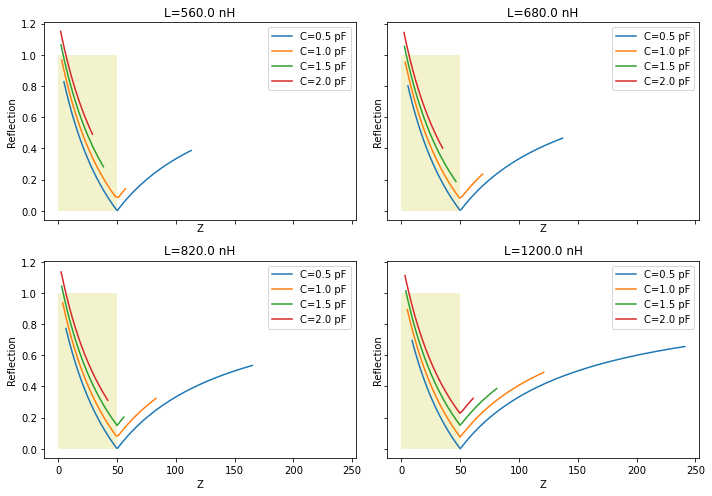

In [28]:
offset = np.array([0, .25, .5, .75])*0.3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,7))

for idx, ax in enumerate(fig.get_axes()):
    for idy, C_tot in enumerate(C_list):
        Z = Z_resonant(Rm, L_list[idx], C_tot, Rdevice)
        ax.plot(Z, Reflection(Z)+offset[idy], label='C={} pF'.format(C_tot*10**12))
        #ax.vlines(50, min(Rdevice), max(Rdevice))
        ax.set_xlabel(r'Z')
        ax.set_ylabel(r'Reflection')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    ax.fill([0, 0, 50, 50],[0, 1, 1, 0 ], 'y', alpha=0.2)
    
plt.tight_layout()

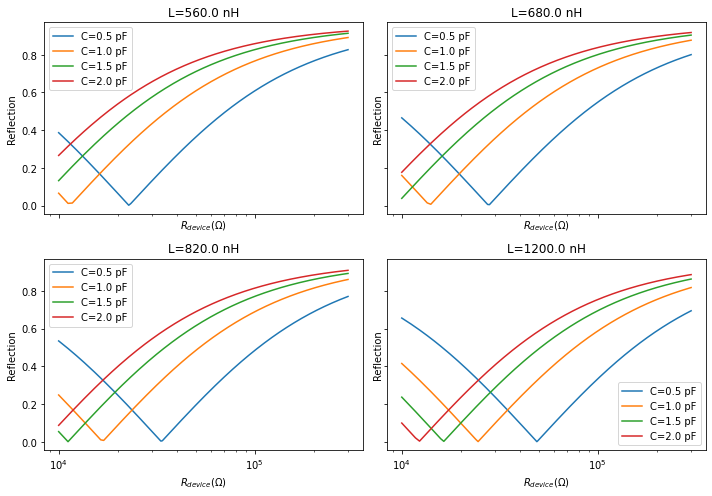

In [31]:
offset = np.array([0, .25, .5, .75])*0.3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,7))

for idx, ax in enumerate(fig.get_axes()):
    for idy, C_tot in enumerate(C_list):
        Z = Z_resonant(Rm, L_list[idx], C_tot, Rdevice)
        ax.semilogx(Rdevice, Reflection(Z), label='C={} pF'.format(C_tot*10**12))
        #ax.vlines(50, min(Rdevice), max(Rdevice))
        ax.set_xlabel(r'$R_{device} (\Omega)$')
        ax.set_ylabel(r'Reflection')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    #ax.fill([0, 0, 50, 50],[0, 1, 1, 0 ], 'y', alpha=0.2)
    
plt.tight_layout()

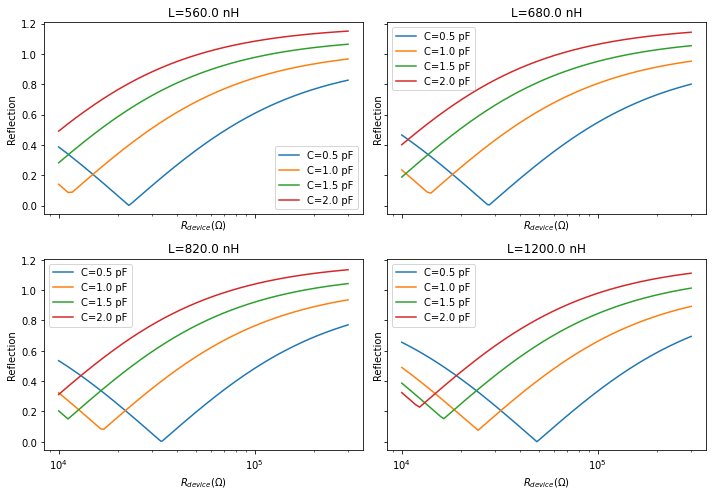

In [29]:
offset = np.array([0, .25, .5, .75])*0.3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,7))

for idx, ax in enumerate(fig.get_axes()):
    for idy, C_tot in enumerate(C_list):
        Z = Z_resonant(Rm, L_list[idx], C_tot, Rdevice)
        ax.semilogx(Rdevice, Reflection(Z)+offset[idy], label='C={} pF'.format(C_tot*10**12))
        #ax.vlines(50, min(Rdevice), max(Rdevice))
        ax.set_xlabel(r'$R_{device} (\Omega)$')
        ax.set_ylabel(r'Reflection')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    #ax.fill([0, 0, 50, 50],[0, 1, 1, 0 ], 'y', alpha=0.2)
    
plt.tight_layout()

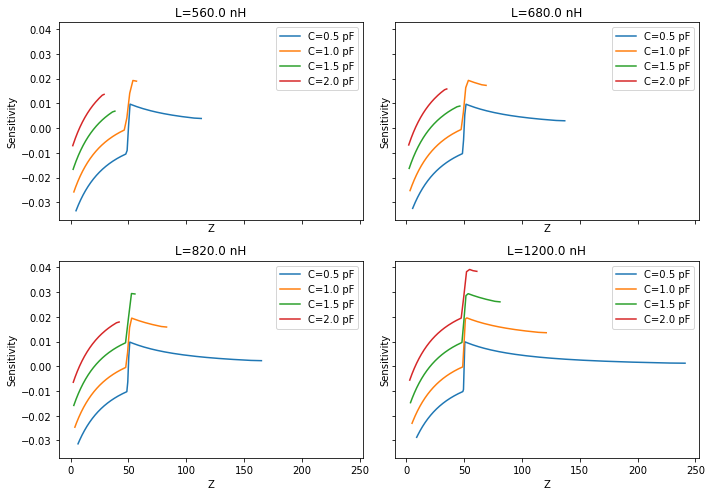

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,7))  
for idx, ax in enumerate(fig.get_axes()):
    for idy, C_tot in enumerate(C_list):
        Z = Z_resonant(Rm, L_list[idx], C_tot, Rdevice)
        ax.plot(Z, np.gradient(Reflection(Z), Z)+idy*0.01, label='C={} pF'.format(C_tot*10**12))
        ax.set_xlabel(r'Z')
        ax.set_ylabel(r'Sensitivity')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    #ax.fill([0, 0, 50, 50],[0, 1, 1, 0 ], 'y', alpha=0.2)

fig.tight_layout()

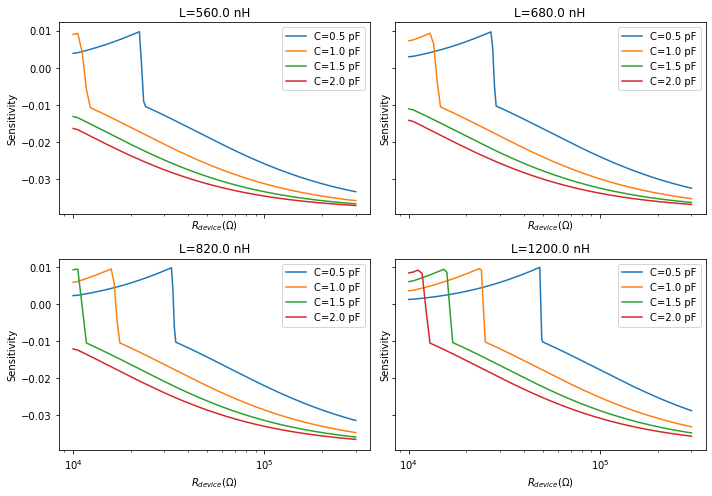

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,7))  
for idx, ax in enumerate(fig.get_axes()):
    for idy, C_tot in enumerate(C_list):
        Z = Z_resonant(Rm, L_list[idx], C_tot, Rdevice)
        ax.semilogx(Rdevice, np.gradient(Reflection(Z), Z), label='C={} pF'.format(C_tot*10**12))
        ax.set_xlabel(r'$R_{device} (\Omega)$')
        ax.set_ylabel(r'Sensitivity')
        ax.grid(which='both')
        ax.title.set_text('L={} nH'.format(L_list[idx]*10**9))
        ax.legend()
    #ax.fill([0, 0, 50, 50],[0, 1, 1, 0 ], 'y', alpha=0.2)

fig.tight_layout()